This notebook is meant to explore the relationship between our transportation data and the CO2 emissions

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import is_numeric_dtype

In [2]:
transportation_df = pd.read_csv(".\data\Monthly_Transportation_Statistics.csv")

Extract the month and year from the datetime column and make new columns to hold those values 

In [3]:
transportation_df['Month'] = [int(datetime.split('/')[0]) for datetime in transportation_df['Date']]
transportation_df['Year'] = [int(datetime.split('/')[2][0:4]) for datetime in transportation_df['Date']]

In [4]:
transportation_df.tail()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance,Transborder - U.S. - Canada Freight,Month,Year
880,880,5/1/2020 0:00,22.0,NaN,NaN,"8,430,000","190,000","8,240,000","5,630,575","128,612,616",...,"9,488,000","190,000","2,709,000","8,240,000","56,068,942,704","25,367,164,296",0.890796,"30,701,778,408",5,2020
881,881,6/1/2020 0:00,29.0,NaN,NaN,"16,490,000.00","400,000","16,090,000","7,069,441","159,137,385",...,"10,102,000","400,000","2,967,000","16,090,000","82,051,488,528.00","41,591,152,333",NaN,"40,460,336,195",6,2020
882,882,7/1/2020 0:00,55.0,NaN,NaN,NaN,NaN,NaN,"6,906,061","176,412,126",...,"11,023,000",NaN,"3,498,000",NaN,"90,959,108,077","47,536,726,155",NaN,"43,422,381,922",7,2020
883,883,8/1/2020 0:00,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2020
884,884,9/1/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020


In [5]:
#make a df with only the air transportation data 
air_transport_df = transportation_df[["Month", "Year", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted",  "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted"]]

In [6]:
#Consider any NA values - for now, I am just going to fill the ones that are NAN with 0 in the columns I am looking at

air_transport_df = air_transport_df.rename(columns = {'U.S. Airline Traffic - International - Non Seasonally Adjusted' : 'airline_international',
                                                      'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted' : 'airline_domestic',
                                                        'U.S. Airline Traffic - Total - Non Seasonally Adjusted' : 'airline_total'})

air_transport_df['airline_domestic'] = air_transport_df['airline_domestic'].fillna(0)
air_transport_df['airline_international'] = air_transport_df['airline_international'].fillna(0)
air_transport_df['airline_total'] = air_transport_df['airline_total'].fillna(0)


#Let's just look at data since 2017
air_transport_recent = air_transport_df[air_transport_df["Year"].astype(int) >= 2017]

Let's set the index to be the month and year combined

In [7]:
air_transport_recent.loc[:, "Month-Year"] = air_transport_recent.loc[:, "Month"].astype(str) + '-' + air_transport_recent.loc[:, "Year"].astype(str) 
air_transport_recent.set_index("Month-Year", inplace = True)

C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
#take out any commas in the data
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(str)
air_transport_recent.loc[:, 'airline_international'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_international']]
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(float)

air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(str)
air_transport_recent.loc[:, 'airline_domestic'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_domestic']]
air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(float)

air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(str)
air_transport_recent.loc[:, 'airline_total'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_total']]
air_transport_recent.loc[:, 'airline_total'] = air_transport_recent.loc[:,'airline_total'].astype(float)



In [9]:
air_transport_recent.head()

,Month,Year,airline_total,airline_international,airline_domestic
Month-Year,,,,,
1-2017,1,2017,62620000.0,8510000.0,54110000.0
2-2017,2,2017,58380000.0,7300000.0,51080000.0
3-2017,3,2017,72960000.0,9000000.0,63960000.0
4-2017,4,2017,70260000.0,9160000.0,61100000.0
5-2017,5,2017,73680000.0,9240000.0,64440000.0


Let's look at the total non seasonally adjusted data by month 


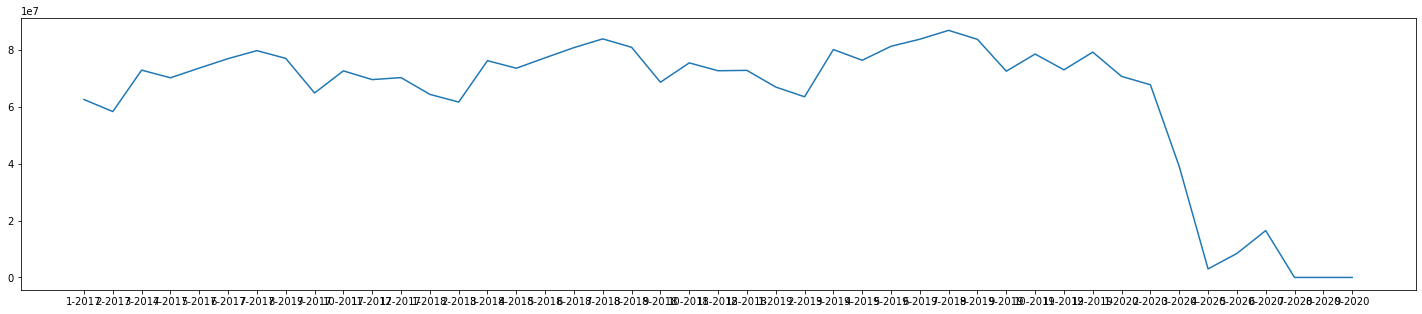

In [10]:
plt.figure(figsize=(25, 5))
plt.plot(air_transport_recent["airline_total"])

plt.show()

Next I add the CO2 data to see if it is correlated 

READ IN THE NATIONWIDE CO2 DATA

In [18]:
country_CO2_df = pd.read_csv(r'.\\data\NOAACO2.csv')
#The last row is all NUll
country_CO2_df.drop(index = 750, inplace = True)
#The days column all have a slash at the end - we will take that off of there
country_CO2_df["days"] = [country_CO2_df.loc[row, "days"][0:2] for row in range(len(country_CO2_df))]
country_CO2_df["month"] = country_CO2_df["month"].astype(int)
country_CO2_df.head()

,year,month,decimaldate,average,interpolated,trend,days
0,1958,3,"1,958,208",315.71,315.71,314.62,-1
1,1958,4,"1,958,292",317.45,317.45,315.29,-1
2,1958,5,"1,958,375",317.50,317.50,314.71,-1
3,1958,6,"1,958,458",-99.99,317.10,314.85,-1
4,1958,7,"1,958,542",315.86,315.86,314.98,-1


In [19]:
#add a column that combines the month and year and set that as the index 
country_CO2_df["Month-Year"] = [str(country_CO2_df.loc[row, "month"]) + '-' + country_CO2_df.loc[row, "year"] for row in range(len(country_CO2_df))]

recent_CO2_us = country_CO2_df[country_CO2_df["year"].astype(int) >= 2017]
recent_CO2_us.set_index("Month-Year", inplace = True)

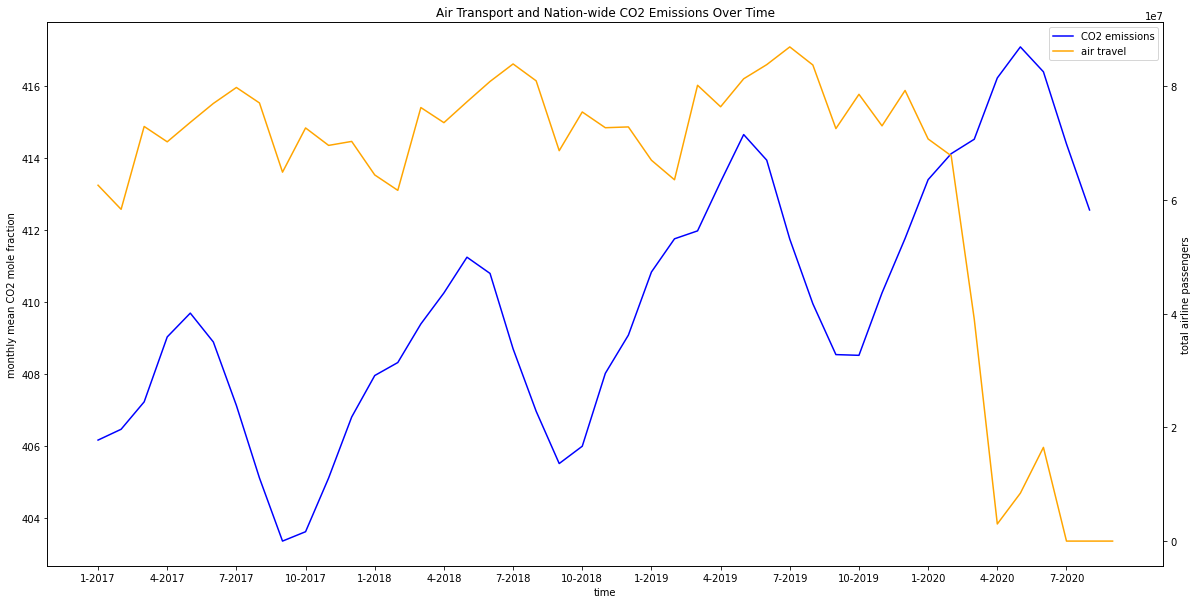

In [20]:
#Plot the CO2 and transportation data together
figure, axis_1 = plt.subplots(figsize=(20,10))
axis_1.plot(recent_CO2_us["average"], color = "blue", label = 'CO2 emissions')
axis_2 = axis_1.twinx()
axis_2.plot(air_transport_recent["airline_total"], color = "orange", label = 'air travel')

#get every third month so our x axis isnt cluttered
every_third = np.arange(0, len(recent_CO2_us), 3)
months = list(recent_CO2_us.index)
every_third_month = [months[x] for x in every_third]

axis_1.set_title('Air Transport and Nation-wide CO2 Emissions Over Time')
axis_1.set_xlabel('time')
axis_1.set_ylabel('monthly mean CO2 mole fraction')
axis_2.set_ylabel('total airline passengers')

#Set the x ticks to every third value
plt.xticks(every_third_month)

#Plot the legened
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

axis_1.legend(lines, labels, loc=0)

plt.show()

That doesn't make much sense! I wonder if we would see some more correlation with car traffic... let's look

In [34]:
highway_miles_df = transportation_df.loc[:, ["Month", "Year", "Highway Vehicle Miles Traveled - All Systems"]]
highway_miles_df = highway_miles_df.rename(columns = {"Highway Vehicle Miles Traveled - All Systems" : "highway_miles"})
#fill na values
highway_miles_df = highway_miles_df.fillna(0)
#make a column with the month and year just like we did above
highway_miles_df.loc[:, "Month-Year"] = highway_miles_df.loc[:, "Month"].astype(str) + '-' + highway_miles_df.loc[:, "Year"].astype(str) 


In [51]:
#many of the rows have null values in the miles column.... we only want the ones with values
highway_recorded = highway_miles_df[highway_miles_df['highway_miles'] != 0]
highway_recorded.set_index('Month-Year', inplace = True)
#Take out the commas from the mileage values
highway_recorded.loc[:, 'highway_miles'] = [float(s.replace(',','')) for s in highway_recorded.loc[:, 'highway_miles']]


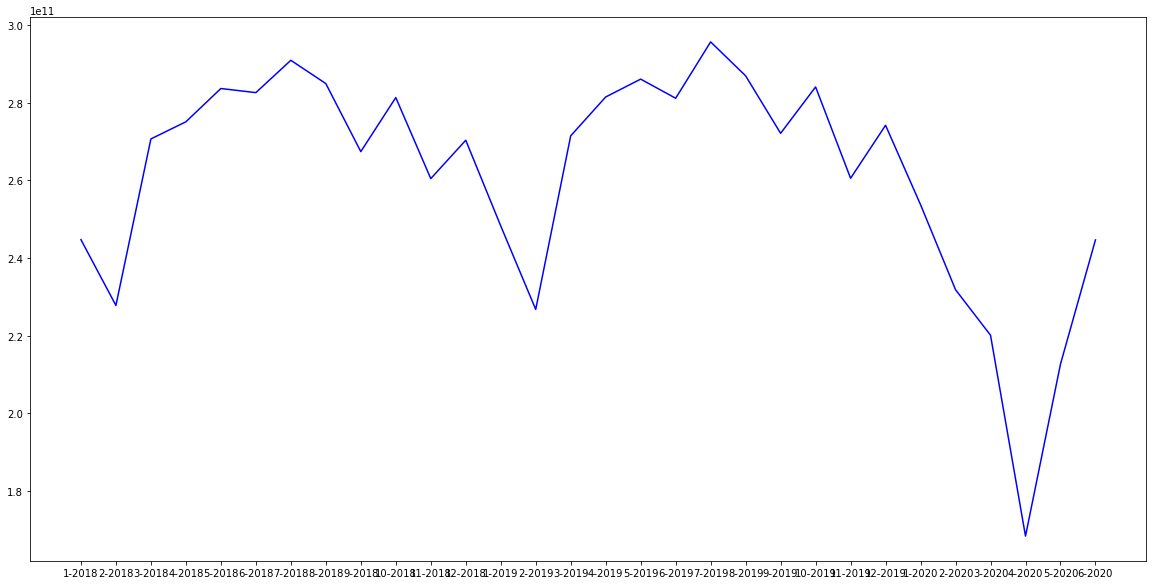

In [53]:
#plot the highway data
figure, highway = plt.subplots(figsize=(20,10))
highway.plot(highway_recorded["highway_miles"], color = "blue", label = 'Highway Miles - All Systems')


In [61]:
#our highway data only goes back to 2018, so we will use CO2 data that starts there as well
CO2_2018 = recent_CO2_us[recent_CO2_us['year'].astype(int) >= 2018]

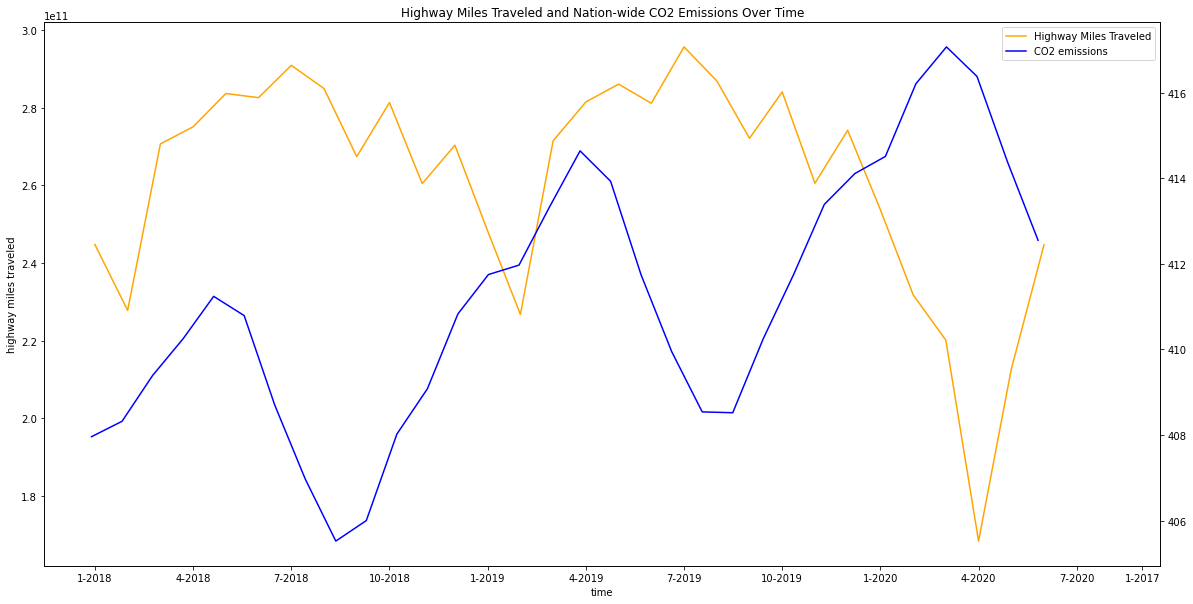

In [74]:
#Plot the CO2 and highway data together
figure2, highway_graph = plt.subplots(figsize=(20,10))
highway_graph.plot(highway_recorded['highway_miles'], color = "orange", label = 'Highway Miles Traveled')
CO2_graph = highway_graph.twinx()
CO2_graph.plot(CO2_2018["average"], color = "blue", label = 'CO2 emissions')

#get every third month so our x axis isnt cluttered
every_third_2018 = np.arange(0, len(CO2_2018), 3)
months_2018_on = list(CO2_2018.index)
every_third_month_2018 = [months_2018_on[x] for x in every_third_2018]

highway_graph.set_title('Highway Miles Traveled and Nation-wide CO2 Emissions Over Time')
highway_graph.set_xlabel('time')
highway_graph.set_ylabel('monthly mean CO2 mole fraction')
highway_graph.set_ylabel('highway miles traveled')

#Set the x ticks to every third value
plt.xticks(every_third_month)

#Plot the legened
highway_lines, highway_labels = highway_graph.get_legend_handles_labels()
CO2_lines, CO2_labels = CO2_graph.get_legend_handles_labels()

highway_CO2_lines = highway_lines + CO2_lines
highway_CO2_labels = highway_labels + CO2_labels

highway_graph.legend(highway_CO2_lines, highway_CO2_labels, loc=0)

plt.show()

After doing all of the analysis above, I read the documentation from NASA closer (https://climate.nasa.gov/vital-signs/carbon-dioxide/) and those CO2 values were all observed in a Hawaii observatory. I do not believe that we can make any sort of assertion about the US as a whole from Hawaii Data

I will aggregate the state-level CO2 data to observe that instead

In [133]:
state_CO2 = pd.read_excel("./data/total_CO2_emissions.xlsx")

In [134]:
new_header = state_CO2.iloc[3] #grab the first row for the header
state_CO2 = state_CO2[4:] #take the data less the header row
state_CO2.columns = new_header #set the header row as the df header
state_CO2.set_index('State', inplace = True)

Let's flip the dataframe so that we can see the total emissions over the years in a column

In [135]:
state_CO2_flip = state_CO2.transpose()
state_CO2_flip.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Wisconsin,Wyoming,Total of states (unadjusted)¹,Adjustment to match United States,United States,NaN,"Sources: U.S. Energy Information Administration (EIA), State Energy Data System and EIA calculations made for this table. United States national-level total, EIA Monthly Energy Review, July 2019 Section 11.","Note: The District of Columbia is included in the data tables, but not in the analysis as it is not a state.",¹State values in this table are unadjusted.,The adjustment factor is allocated to each state by the share of that state’s emissions of the national total. See Table 2. for the adjusted state values.
3,,,,,,,,,,,,,,,,,,,,,
1990.0,110.01,34.54,62.88,50.92,357.64,66.02,40.71,16.67,4.45,188.32,...,85.67,56.87,5053.7,-14.9214,5038.78,NaN,NaN,NaN,NaN,NaN
1991.0,114.39,35.16,63.79,49.84,345.31,67.29,39.89,17.46,4.39,189.52,...,87.99,55.19,5010.59,-16.8508,4993.74,NaN,NaN,NaN,NaN,NaN
1992.0,121.04,36.58,66.61,51.45,349.49,68.27,40.18,16.29,4.36,191.85,...,87.08,60.89,5092.69,-0.968338,5091.72,NaN,NaN,NaN,NaN,NaN
1993.0,125.63,36.43,68.85,50.52,338.89,71.98,38.19,17.73,4.54,194.93,...,90.23,57.92,5198.56,-15.9524,5182.61,NaN,NaN,NaN,NaN,NaN
1994.0,123.56,36.26,71.56,54.41,354.9,72.39,37.46,17.05,4.51,202.26,...,93.37,60.11,5275.25,-15.3389,5259.91,NaN,NaN,NaN,NaN,NaN


Clean the data for visualization

In [162]:
#only select the columns that we are interested in - the total US CO2 emissions
state_plot = state_CO2_flip.loc[:, ['Total of states (unadjusted)¹', 'United States']]
#drop their calculated columns
state_plot.drop(index = 'Percent', inplace = True)
state_plot.drop(index = 'Absolute', inplace = True)
state_plot.reset_index(inplace = True)
state_plot = state_plot.rename(columns = {3 : 'Year'})



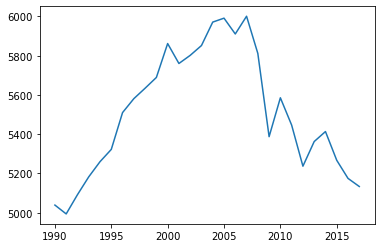

In [163]:
plt.plot(state_plot['Year'], state_plot['United States'].astype(float))

In [ ]:
s